In [25]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

### read data

In [2]:
dat = pd.read_csv("train.csv")
dat.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [11]:
dat.shape

(125497040, 6)

### onpromotion 

In [8]:
dat.groupby('onpromotion').count()

,id,date,store_nbr,item_nbr,unit_sales
onpromotion,,,,,
False,96028767,96028767,96028767,96028767,96028767
True,7810622,7810622,7810622,7810622,7810622


In [18]:
# false proportion
96028767/125497040

0.7651875056176624

In [19]:
# true proportion
7810622/125497040

0.06223749978485548

In [12]:
# the number that onpromotion has value
96028767+7810622

103839389

In [16]:
# the number that onpromotion doesn't have value
125497040-103839389

21657651

In [15]:
# confirm the value above is correct
dat['onpromotion'].isnull().sum()

21657651

In [17]:
# null value proportion
21657651/125497040

0.17257499459748213

#### Conclusion
The onpromotion variable is a binary variable, which has two values: 'False' and 'True'.  False accounts about 76.52%. True accounts about 6.22%. There are 17.26% values of onpromotion is null.

#### Thoughts
Need to handle null value

### unit_sales

In [20]:
# the number of nagetive values unit_sales variable has
(dat.unit_sales < 0).sum()

7795

In [21]:
dat.groupby('unit_sales').count()

,id,date,store_nbr,item_nbr,onpromotion
unit_sales,,,,,
-15372.000,1,1,1,1,1
-10002.000,1,1,1,1,1
-4673.000,1,1,1,1,1
-3606.000,1,1,1,1,1
-3600.000,1,1,1,1,1
-3451.363,1,1,1,1,1
-2487.000,1,1,1,1,1
-2400.000,2,2,2,2,2
-1943.000,1,1,1,1,1


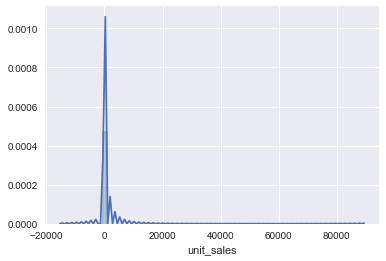

In [27]:
%matplotlib inline
x = dat['unit_sales']
sns.distplot(x);

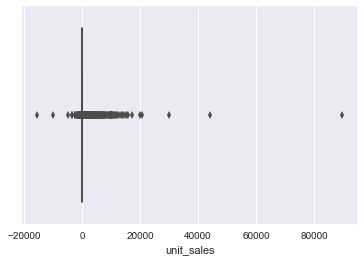

In [29]:
%matplotlib inline
sns.boxplot(x);

In [22]:
# there is no null value of unit_sales
dat['unit_sales'].isnull().sum()

0

#### Conclusion:
1. There are 7795 negative values of unit_sales, which represent returns of that particular item.
2. The distribution of unit_sales is quite dispersed, the value is between -20000 to 100000, there is no dominant unit_sales value.The 50% spectrum of unit_sales is around -5000 to 20000
3. There are no null values of unit_sales

#### Thoughts:
1. we can seperate products with the negative value of unit_sales from those with positive values of unit_sales when clustering products
2. unit_sales can be integer or float, maybe it is a potential perspective to cluster products

#### Questions：
1. The training data does not include rows for items that had zero unit_sales for a store/date combination. There is no information as to whether or not the item was in stock for the store on the date, and teams will need to decide the best way to handle that situation.

### item_nbr

In [30]:
dat.groupby('item_nbr').count()

,id,date,store_nbr,unit_sales,onpromotion
item_nbr,,,,,
96995,5229,5229,5229,5229,1274
99197,4902,4902,4902,4902,4902
103501,35841,35841,35841,35841,26874
103520,53175,53175,53175,53175,38704
103665,50449,50449,50449,50449,37562
105574,40322,40322,40322,40322,29788
105575,41311,41311,41311,41311,30649
105576,39959,39959,39959,39959,30304
105577,30113,30113,30113,30113,21380


In [33]:
item_2127114 = dat[dat.item_nbr == 2127114]
item_2127114

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
122364747,122364747,2017-07-17,2,2127114,3.0,True
122367391,122367391,2017-07-17,3,2127114,7.0,True
122376130,122376130,2017-07-17,7,2127114,13.0,True
122403540,122403540,2017-07-17,23,2127114,3.0,True
122405789,122405789,2017-07-17,24,2127114,2.0,False
122441380,122441380,2017-07-17,44,2127114,4.0,True
122444096,122444096,2017-07-17,45,2127114,1.0,False
122449287,122449287,2017-07-17,47,2127114,3.0,False
122454465,122454465,2017-07-17,49,2127114,9.0,True
122456949,122456949,2017-07-17,50,2127114,1.0,False


#### Conclusions:
1. There are 4036 different products.
2. Take item_2127114 as an example, there are 247 records, composed of different dates from 2017/7/17 to 2017/8/15 and different stores.

#### Thoughts:
1. If one product has many records, try forecasting one specifc product one at a time.
2. Merge item.csv to train.csv, find similar products by clustering. Try forecasting similar products one at a time using the data obtained by clustering.
3. There are a small number of items seen in the training data that aren't seen in the test data, try excluding them when training model.

### store_nbr

In [35]:
dat.groupby('store_nbr').count()

,id,date,item_nbr,unit_sales,onpromotion
store_nbr,,,,,
1,2562153,2562153,2562153,2562153,2077300
2,2987840,2987840,2987840,2987840,2429380
3,3401264,3401264,3401264,3401264,2772895
4,2830554,2830554,2830554,2830554,2295472
5,2666691,2666691,2666691,2666691,2143074
6,3089799,3089799,3089799,3089799,2512251
7,2921204,2921204,2921204,2921204,2374230
8,3261184,3261184,3261184,3261184,2657180
9,2773790,2773790,2773790,2773790,2259587


#### Conclusions:
1. There are 54 different products.

### date

In [36]:
dat.groupby('date').count()

,id,store_nbr,item_nbr,unit_sales,onpromotion
date,,,,,
2013-01-01,578,578,578,578,0
2013-01-02,41676,41676,41676,41676,0
2013-01-03,40100,40100,40100,40100,0
2013-01-04,40048,40048,40048,40048,0
2013-01-05,42534,42534,42534,42534,0
2013-01-06,41873,41873,41873,41873,0
2013-01-07,39300,39300,39300,39300,0
2013-01-08,39131,39131,39131,39131,0
2013-01-09,39036,39036,39036,39036,0


#### Conclusion:
1. The date span starts from 2013/1/1 to 2017/8/15.